<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter09/GNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
!pip install -q torch-geometric==2.2.0 torch-sparse==0.6.17 torch-scatter==2.1.1 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.0/565.0 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 51.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
from torch_geometric.datasets import FacebookPagePage

dataset = FacebookPagePage(root=".")
data = dataset[0]

# print info about the dataset
print(f'Dataset: {dataset}')
print('-----------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of edge features: {dataset.num_edge_features}')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

# show the features and label in a tabular format
dfx = pd.DataFrame(data.x.numpy())
dfx['label'] = pd.DataFrame(data.y)
dfx

Processing...
Done!


Dataset: FacebookPagePage()
-----------------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4
Number of graphs: 1
Number of edge features: 0
Number of nodes: 22470
Number of edges: 342004
Average node degree: 15.22
Contains isolated nodes: False
Contains self-loops: True
Is undirected: True


,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,label
0,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,0
1,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.234818,-0.223700,-0.284379,-0.197935,-0.147256,-0.255755,-0.215140,-0.364134,-0.128634,2
2,-0.262576,-0.265053,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.210461,-0.25101,3.222161,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
3,-0.246378,-0.276483,-0.241991,-0.299327,-0.299159,-0.270681,-0.307051,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.265534,-0.080353,-0.209509,-0.250560,-0.180260,-0.375903,-0.223836,2
4,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.175312,-0.272613,-0.224216,-0.181153,-0.255755,-0.215140,-0.370639,-0.223836,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22465,-0.262576,-0.276483,-0.262350,-0.296955,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.255755,-0.196685,-0.370115,-0.223836,3
22466,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.221643,-0.284379,-0.224216,-0.209509,-0.255755,-0.215140,-0.375903,-0.223836,1
22467,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307757,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.146793,-0.255755,-0.180389,-0.372097,-0.222613,2
22468,-0.262576,-0.276483,-0.262350,-0.299327,-0.299159,-0.270681,-0.307668,-0.269733,-0.25101,-0.308343,...,-0.273229,-0.223700,-0.284379,-0.224216,-0.209509,-0.252456,-0.215140,-0.375903,-0.218148,1


In [3]:
from torch_geometric.utils import to_dense_adj

# Create masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Adjacency matrix
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [4]:
print(data.x[0])

tensor([-0.2626, -0.2765, -0.2624, -0.2993, -0.2992, -0.2707, -0.3078, -0.2697,
        -0.2510, -0.3083, -0.3702, -0.2257, -0.2773, -0.4484, -0.3127, -0.1475,
        -0.2658, -0.3512, -0.2864, -0.1716, -0.2636, -0.2405, -0.1809, -0.2233,
        -0.2109, -0.4077, -0.2733, -0.2454, -0.2727, -0.2096, -0.2025, -0.2894,
        -0.2657, -0.4149, -0.2278, -0.2183, -0.3146, -0.3444, -0.1876, -0.1912,
        -0.3012, -0.3117, -0.1762, -0.2389, -0.2053, -0.1912, -0.2558, -0.2034,
        -0.2479, -0.2715, -0.3031, -0.2698, -0.2262,  3.3398, -0.3071, -0.2116,
        -0.2784, -0.2987, -0.3605, -0.2487, -0.2801, -0.2067,  0.3931, -0.3063,
        -0.2159, -0.2407,  0.2434, -0.2204, -0.2196, -0.2343, -0.1427, -0.2566,
        -0.2787, -0.1535, -0.1822, -0.2439, -0.2701, -0.2878, -0.1846, -0.2401,
        -0.2520, -0.2174, -0.2742, -0.4552, -0.2763,  6.3814, -0.1880, -0.3621,
        -0.2370, -0.2380, -0.3073, -0.2643, -0.2724, -0.2327, -0.2046, -0.2470,
        -0.3129, -0.2019, -0.2382, -0.27

In [5]:
from collections import Counter
Counter([x.item() for x in data.y[data.test_mask]])

Counter({3: 642, 1: 698, 2: 754, 0: 375})

In [6]:
from torch_geometric.utils.dropout import dropout_adj
import random

def drop_node_and_edges(x, y, adjacency, class_nodes, indices, drop_ratio):
    node_num, _ = class_nodes.size()
    drop_num = int(node_num * drop_ratio)

    idx_mask = random.choices(indices, k=drop_num)

    x = np.delete(x, idx_mask, 0)
    y = np.delete(y, idx_mask, 0)
    adjacency =  np.delete(adjacency, idx_mask, 0)
    adjacency =  np.delete(adjacency, idx_mask, 1)

    return x, y, adjacency

In [7]:
import numpy as np

# Print proportion of various classes in the dataset
print("Proportion of various classes before droping nodes")
counter = Counter(data.y.numpy())
total = len(data.y)
for class_id, count in counter.items():
    proportion = count / total
    print(f'Class {class_id}: {proportion * 100:.2f}%')


# Make the dataset extremely imbalanced
class_to_reduce = 1  # This is the class you want to reduce. Change it as per your requirement
reduction_factor = 0.1  # This is the factor by which you want to reduce the class. Change it as per your requirement

indices = np.where(data.y.numpy() == class_to_reduce)[0]
class_nodes = data.x[indices]

x1, y1, adjacency1 = drop_node_and_edges(data.x, data.y, adjacency, class_nodes, indices, reduction_factor)

# Print proportion of various classes in the dataset
print("Proportion of various classes after droping nodes of class " +str(class_to_reduce)+ " with a factor of "+str(reduction_factor))
counter = Counter(y1.numpy())
total = len(y1)
for class_id, count in counter.items():
    proportion = count / total
    print(f'Class {class_id}: {proportion * 100:.2f}%')

print("number of nodes before droping nodes: "+str(len(data.x)))
print("number of nodes after droping nodes: "+str(len(x1)))
print("shape of adjacency before droping nodes: "+str(adjacency.size()))
print("shape of adjacency after droping nodes: "+str(adjacency1.size()))

Proportion of various classes before droping nodes
Class 0: 14.81%
Class 2: 30.62%
Class 1: 28.91%
Class 3: 25.67%
Proportion of various classes after droping nodes of class 1 with a factor of 0.1
Class 0: 15.23%
Class 2: 31.49%
Class 1: 26.89%
Class 3: 26.40%
number of nodes before droping nodes: 22470
number of nodes after droping nodes: 21851
shape of adjacency before droping nodes: torch.Size([22470, 22470])
shape of adjacency after droping nodes: torch.Size([21851, 21851])


In [8]:
from torch_geometric.data import Data
from torch_geometric.utils import dense_to_sparse

data1 = Data(x=x1, edge_index=dense_to_sparse(adjacency1)[0], y=y1)

# split data
# Create masks
data1.train_mask = range(17529)
data1.val_mask = range(17529, 19000)
data1.test_mask = range(19000,  21850)


In [9]:
import torch.nn.functional as F
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from itertools import cycle

import matplotlib.pyplot as plt

def display_precision_recall_curve(y1_test_one_hot, y1_score):
    # For each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    n_classes=4
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y1_test_one_hot[:, i], y1_score[:, i])
        average_precision[i] = average_precision_score(y1_test_one_hot[:, i], y1_score[:, i])

    # A "micro-average": quantifying score on all classes jointly
    precision["micro"], recall["micro"], _ = precision_recall_curve(
        y1_test_one_hot.ravel(), y1_score.ravel()
    )
    average_precision["micro"] = average_precision_score(y1_test_one_hot, y1_score, average="micro")
    # setup plot details
    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

    _, ax = plt.subplots(figsize=(8, 6))

    f_scores = np.linspace(0.2, 0.8, num=4)
    lines, labels = [], []

    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
        plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color='gold')

    linestyle = ['-', '--', '-.', 'dotted']
    idxls=0
    for i, color in zip(range(n_classes), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i}", linestyle = linestyle[idxls], color=color)
        idxls += 1

    # add the legend for the iso-f1 curves
    handles, labels = display.ax_.get_legend_handles_labels()
    handles.extend([l])
    labels.extend(["iso-f1 curves"])
    # set the legend and the axes
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    ax.set_title("Extension of Precision-Recall curve to multi-class")

    plt.show()

In [10]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

# Set the random seed for PyTorch for reproducibility.
torch.manual_seed(0)

def calculate_accuracy(predicted_labels, true_labels):
    """Calculates accuracy of model predictions."""
    correct_predictions = torch.sum(predicted_labels == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

class MultiLayerPerceptron(torch.nn.Module):
    """Implements a Multilayer Perceptron (MLP) model."""
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear_layer1 = Linear(input_dim, hidden_dim)
        self.linear_layer2 = Linear(hidden_dim, output_dim)

    def forward(self, x):
        """Forward pass of the MLP."""
        x = self.linear_layer1(x)
        x = torch.relu(x)
        x = self.linear_layer2(x)
        return F.log_softmax(x, dim=1)

    def train_model(self, data, num_epochs):
        """Trains the MLP model."""
        loss_function = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()

        for epoch in range(num_epochs + 1):
            optimizer.zero_grad()
            model_output = self(data.x)
            true_train_labels = data.y[data.train_mask]

            loss = loss_function(model_output[data.train_mask], true_train_labels)
            accuracy = calculate_accuracy(model_output[data.train_mask].argmax(dim=1), true_train_labels)

            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                true_val_labels = data.y[data.val_mask]
                val_loss = loss_function(model_output[data.val_mask], true_val_labels)
                val_accuracy = calculate_accuracy(model_output[data.val_mask].argmax(dim=1), true_val_labels)

                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {accuracy*100:.2f}% | '
                      f'Val Loss: {val_loss:.2f} | Val Acc: {val_accuracy*100:.2f}%')

    @torch.no_grad()
    def evaluate_model(self, data):
        """Evaluates the MLP model."""
        self.eval()

        model_output = self(data.x)
        test_accuracy = calculate_accuracy(model_output.argmax(dim=1)[data.test_mask], data.y[data.test_mask])

        return test_accuracy,  model_output[data.test_mask,:]


In [11]:
mlp_model = MultiLayerPerceptron(input_dim=128, hidden_dim=64, output_dim=4)
mlp_model.train_model(data1, 100)
acc,_ = mlp_model.evaluate_model(data1)
print(f'\nMLP test accuracy: {acc*100:.2f}%\n')

Epoch   0 | Train Loss: 1.420 | Train Acc: 22.07% | Val Loss: 1.42 | Val Acc: 20.60%
Epoch  20 | Train Loss: 0.585 | Train Acc: 76.80% | Val Loss: 0.63 | Val Acc: 74.98%
Epoch  40 | Train Loss: 0.516 | Train Acc: 79.58% | Val Loss: 0.61 | Val Acc: 74.98%
Epoch  60 | Train Loss: 0.470 | Train Acc: 81.62% | Val Loss: 0.62 | Val Acc: 75.19%
Epoch  80 | Train Loss: 0.429 | Train Acc: 83.49% | Val Loss: 0.64 | Val Acc: 75.32%
Epoch 100 | Train Loss: 0.395 | Train Acc: 84.86% | Val Loss: 0.66 | Val Acc: 74.85%

MLP test accuracy: 75.61%



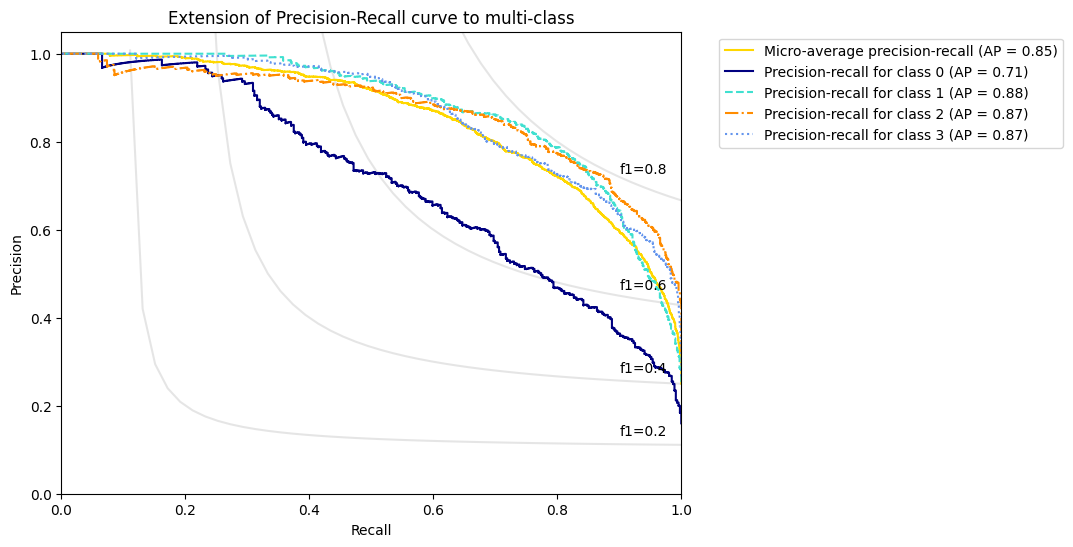

In [12]:
_,y1_score = mlp_model.evaluate_model(data1)
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y1_score)

In [13]:
# Adapted from https://github.com/PacktPublishing/Hands-On-Graph-Neural-Networks-Using-Python/blob/main/Chapter05/chapter5.ipynb

class GraphNeuralNetworkLayer(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear_transform = Linear(input_dim, output_dim, bias=False)

    def forward(self, node_features, adjacency_matrix):
        transformed_features = self.linear_transform(node_features)
        propagated_features = torch.sparse.mm(adjacency_matrix, transformed_features)
        return propagated_features

class GraphNeuralNetwork(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.gnn_layer1 = GraphNeuralNetworkLayer(input_dim, hidden_dim)
        self.gnn_layer2 = GraphNeuralNetworkLayer(hidden_dim, output_dim)

    def forward(self, node_features, adjacency_matrix):
        hidden_representations = self.gnn_layer1(node_features, adjacency_matrix)
        hidden_representations = torch.relu(hidden_representations)
        output_representations = self.gnn_layer2(hidden_representations, adjacency_matrix)
        return F.log_softmax(output_representations, dim=1)

    def train_model(self, data, adjacency_matrix, num_epochs):
        loss_function = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()

        for epoch in range(num_epochs + 1):
            optimizer.zero_grad()
            model_output = self(data.x, adjacency_matrix)

            true_train_labels = data.y[data.train_mask]
            loss = loss_function(model_output[data.train_mask], true_train_labels)
            accuracy = calculate_accuracy(model_output[data.train_mask].argmax(dim=1), true_train_labels)

            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                true_val_labels = data.y[data.val_mask]
                val_loss = loss_function(model_output[data.val_mask], true_val_labels)
                val_accuracy = calculate_accuracy(model_output[data.val_mask].argmax(dim=1), true_val_labels)

                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {accuracy*100:.2f}% | '
                      f'Val Loss: {val_loss:.2f} | Val Acc: {val_accuracy*100:.2f}%')

    @torch.no_grad()
    def evaluate_model(self, data, adjacency_matrix):
        """Evaluates the GNN model."""
        self.eval()

        model_output = self(data.x, adjacency_matrix)
        test_accuracy = calculate_accuracy(model_output.argmax(dim=1)[data.test_mask], data.y[data.test_mask])

        return test_accuracy,  model_output[data.test_mask,:]


In [14]:
gnn_model = GraphNeuralNetwork(input_dim=128, hidden_dim=64, output_dim=4)
gnn_model.train_model(data1, adjacency1, 100)
acc,_ = gnn_model.evaluate_model(data1, adjacency1)
print(f'\nGNN test accuracy: {acc*100:.2f}%\n')

Epoch   0 | Train Loss: 98.200 | Train Acc: 16.28% | Val Loss: 81.54 | Val Acc: 16.52%
Epoch  20 | Train Loss: 9.774 | Train Acc: 79.80% | Val Loss: 4.39 | Val Acc: 80.69%
Epoch  40 | Train Loss: 4.989 | Train Acc: 79.61% | Val Loss: 3.89 | Val Acc: 80.08%
Epoch  60 | Train Loss: 4.981 | Train Acc: 85.06% | Val Loss: 2.87 | Val Acc: 85.18%
Epoch  80 | Train Loss: 1.344 | Train Acc: 86.15% | Val Loss: 1.16 | Val Acc: 85.32%
Epoch 100 | Train Loss: 0.814 | Train Acc: 88.01% | Val Loss: 0.76 | Val Acc: 87.02%

GNN test accuracy: 87.96%



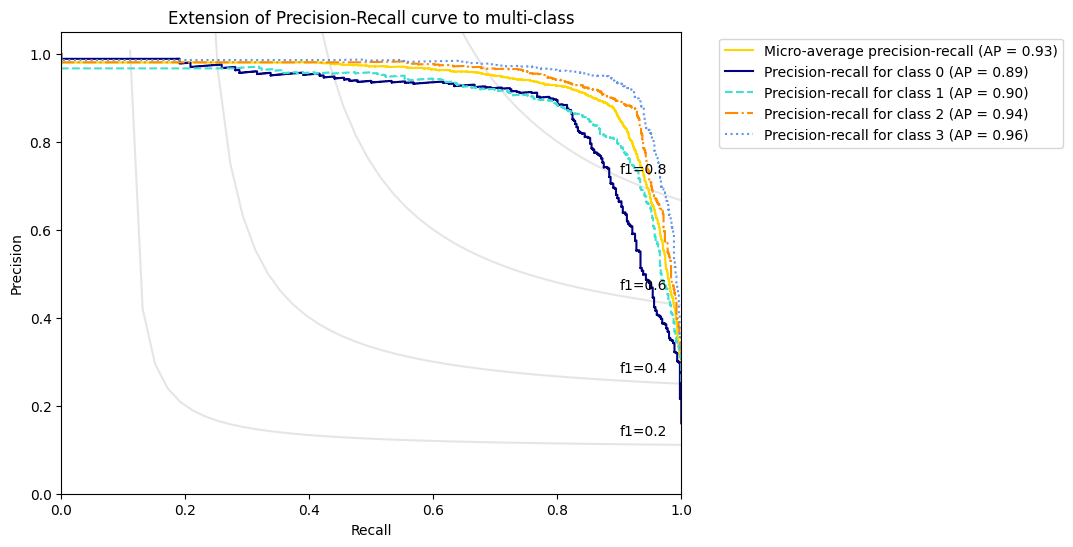

In [15]:
_,y1_score = gnn_model.evaluate_model(data1, adjacency1)
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y1_score)

In [16]:
X_train, X_test, y_train, y_test = data1.x[data1.train_mask].cpu().numpy(), data1.x[data1.test_mask].cpu().numpy(), data1.y[data1.train_mask].cpu().numpy(), data1.y[data1.test_mask].cpu().numpy()

In [17]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, roc_auc_score
import time

xgb_clf = XGBClassifier(eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict_proba(X_test)
test_acc = accuracy_score(y_test, np.argmax(y_pred, axis=1))
test_acc

0.8414035087719298

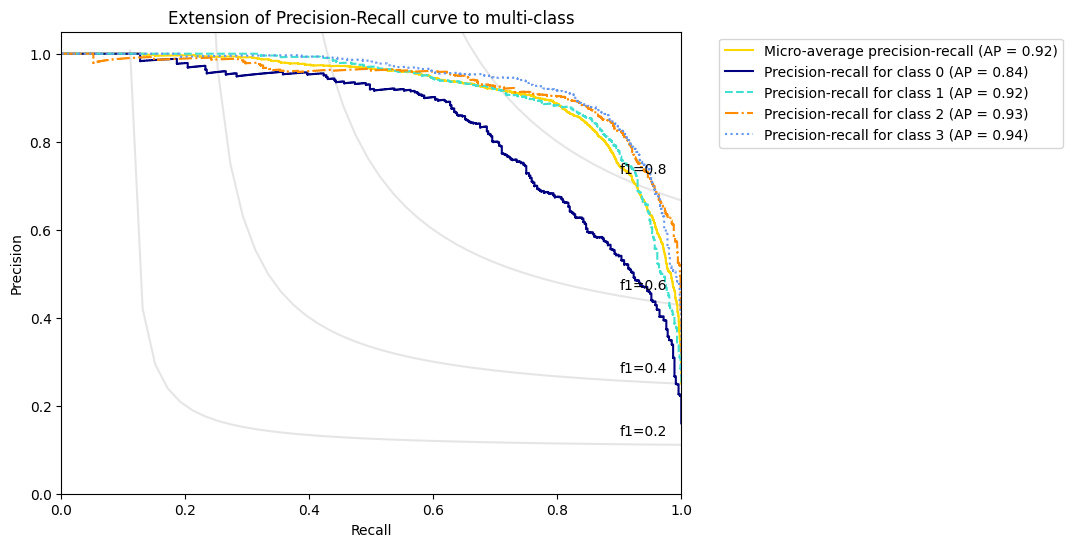

In [18]:
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y_pred)

In [19]:
import torch
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

torch.manual_seed(1)

def compute_accuracy(predicted_labels, true_labels):
    correct_predictions = torch.sum(predicted_labels == true_labels)
    total_predictions = len(true_labels)
    return correct_predictions / total_predictions

class GraphConvolutionalNetwork(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.convolution_layer1 = GCNConv(input_dim, hidden_dim)
        self.convolution_layer2 = GCNConv(hidden_dim, output_dim)

    def forward(self, node_features, edge_index):
        hidden_representation = self.convolution_layer1(node_features, edge_index)
        hidden_representation = torch.relu(hidden_representation)
        output_representation = self.convolution_layer2(hidden_representation, edge_index)

        return F.log_softmax(output_representation, dim=1)

    def train_model(self, data, num_epochs):
        loss_function = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()

        for epoch in range(num_epochs + 1):
            optimizer.zero_grad()

            network_output = self(data.x, data.edge_index)
            true_train_labels = data.y[data.train_mask]

            loss = loss_function(network_output[data.train_mask], true_train_labels)
            accuracy = compute_accuracy(network_output[data.train_mask].argmax(dim=1), true_train_labels)

            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                true_val_labels = data.y[data.val_mask]
                val_loss = loss_function(network_output[data.val_mask], true_val_labels)
                val_accuracy = compute_accuracy(network_output[data.val_mask].argmax(dim=1), true_val_labels)

                print(f'Epoch: {epoch}\n'
                      f'Train Loss: {loss:.3f}, Accuracy: {accuracy*100:.0f}%\n'
                      f'Validation Loss: {val_loss:.2f}, Accuracy: {val_accuracy*100:.0f}%\n'
                      '-------------------')


    @torch.no_grad()
    def evaluate_model(self, data):
        self.eval()

        network_output = self(data.x, data.edge_index)
        test_accuracy = compute_accuracy(network_output.argmax(dim=1)[data.test_mask], data.y[data.test_mask])

        return test_accuracy,  network_output[data.test_mask,:]


In [20]:
# Train GCN
gcn = GraphConvolutionalNetwork(dataset.num_features, 16, dataset.num_classes)
gcn.train_model(data1, num_epochs=100)
acc,_ = gcn.evaluate_model(data1)
print(f'\nGCN test accuracy: {acc*100:.2f}%\n')

Epoch: 0
Train Loss: 1.544, Accuracy: 17%
Validation Loss: 1.53, Accuracy: 18%
-------------------
Epoch: 20
Train Loss: 0.512, Accuracy: 83%
Validation Loss: 0.52, Accuracy: 83%
-------------------
Epoch: 40
Train Loss: 0.330, Accuracy: 89%
Validation Loss: 0.33, Accuracy: 89%
-------------------
Epoch: 60
Train Loss: 0.278, Accuracy: 91%
Validation Loss: 0.28, Accuracy: 92%
-------------------
Epoch: 80
Train Loss: 0.254, Accuracy: 92%
Validation Loss: 0.26, Accuracy: 92%
-------------------
Epoch: 100
Train Loss: 0.238, Accuracy: 93%
Validation Loss: 0.25, Accuracy: 92%
-------------------

GCN test accuracy: 91.72%



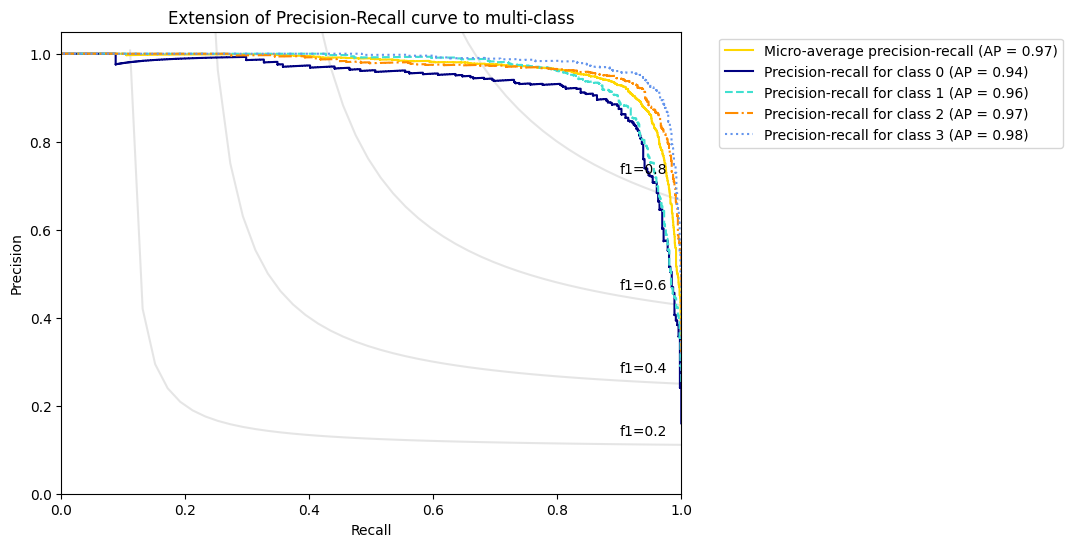

In [21]:
_,y1_score = gcn.evaluate_model(data1)
y1_test_one_hot = F.one_hot(data1.y[data1.test_mask], num_classes=4)
display_precision_recall_curve(y1_test_one_hot, y1_score)